#                                              Final work

In [1]:
import io
import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy import stats

## Загрузить файл hr.csv.

In [2]:
data=pd.read_csv('hr.csv.')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


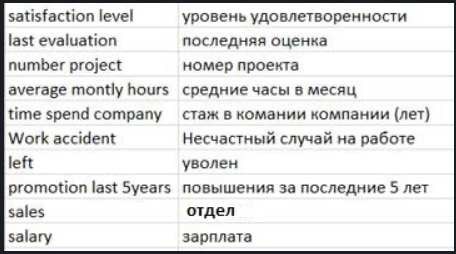

In [18]:
from IPython.display import Image
Image('Описание.png', width=600, height=300)

In [27]:
print('Количество выбросов в data: '+str(data.isnull().sum().sum()))

Количество выбросов в data: 0


In [32]:
print('Количество работников:', len(data))

Количество работников: 14999


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.339823,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.820837,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [4]:
print('Мода выборок типа int64: ')
data.select_dtypes(include = 'int64').mode()

Мода выборок типа int64: 


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,4.0,135,3.0,0.0,0.0,0.0
1,NaN,156,NaN,NaN,NaN,NaN


In [5]:
print('Мода выборок типа float64: ')
data.select_dtypes(include = 'float64').mode()

Мода выборок типа float64: 


,satisfaction_level,last_evaluation
0,0.1,0.55


In [6]:
print('Мода выборок типа object: ')
data.select_dtypes(include = 'object').mode()

Мода выборок типа object: 


,sales,salary
0,sales,low


In [3]:
dataset = data
i = 0
for x in dataset['salary'].unique():
    dataset.loc[dataset['salary'] == x, 'salary'] = i
    i += 1
i = 0
for x in dataset['sales'].unique():
    dataset.loc[dataset['sales'] == x, 'sales'] = i
    i += 1

In [8]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.339823,0.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.820837,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [9]:
print('Мода выборок типа int64: ')
data.select_dtypes(include = 'int64').mode()

Мода выборок типа int64: 


,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,4.0,135,3.0,0.0,0.0,0.0,0.0,0.0
1,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


## Рассчитать и визуализировать корреляционную матрицу для переменных.

In [10]:
dataset.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
sales,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


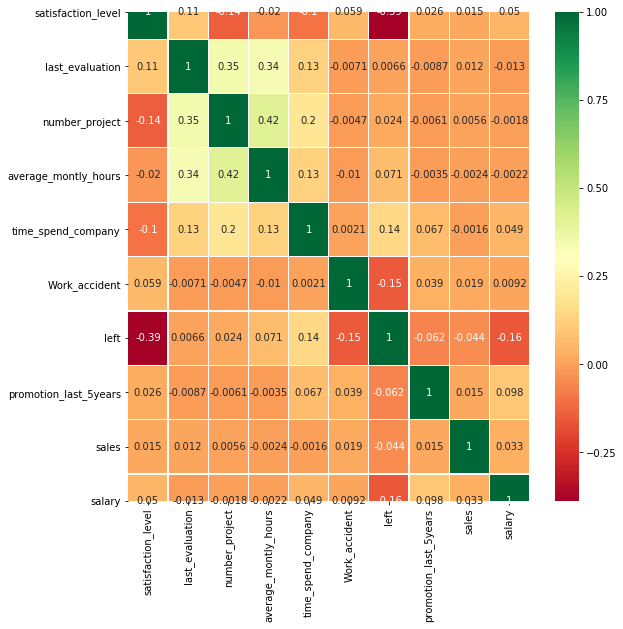

In [11]:
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(9,9)
plt.show()

## Визуализировать несколько взаимосвязей между переменными.

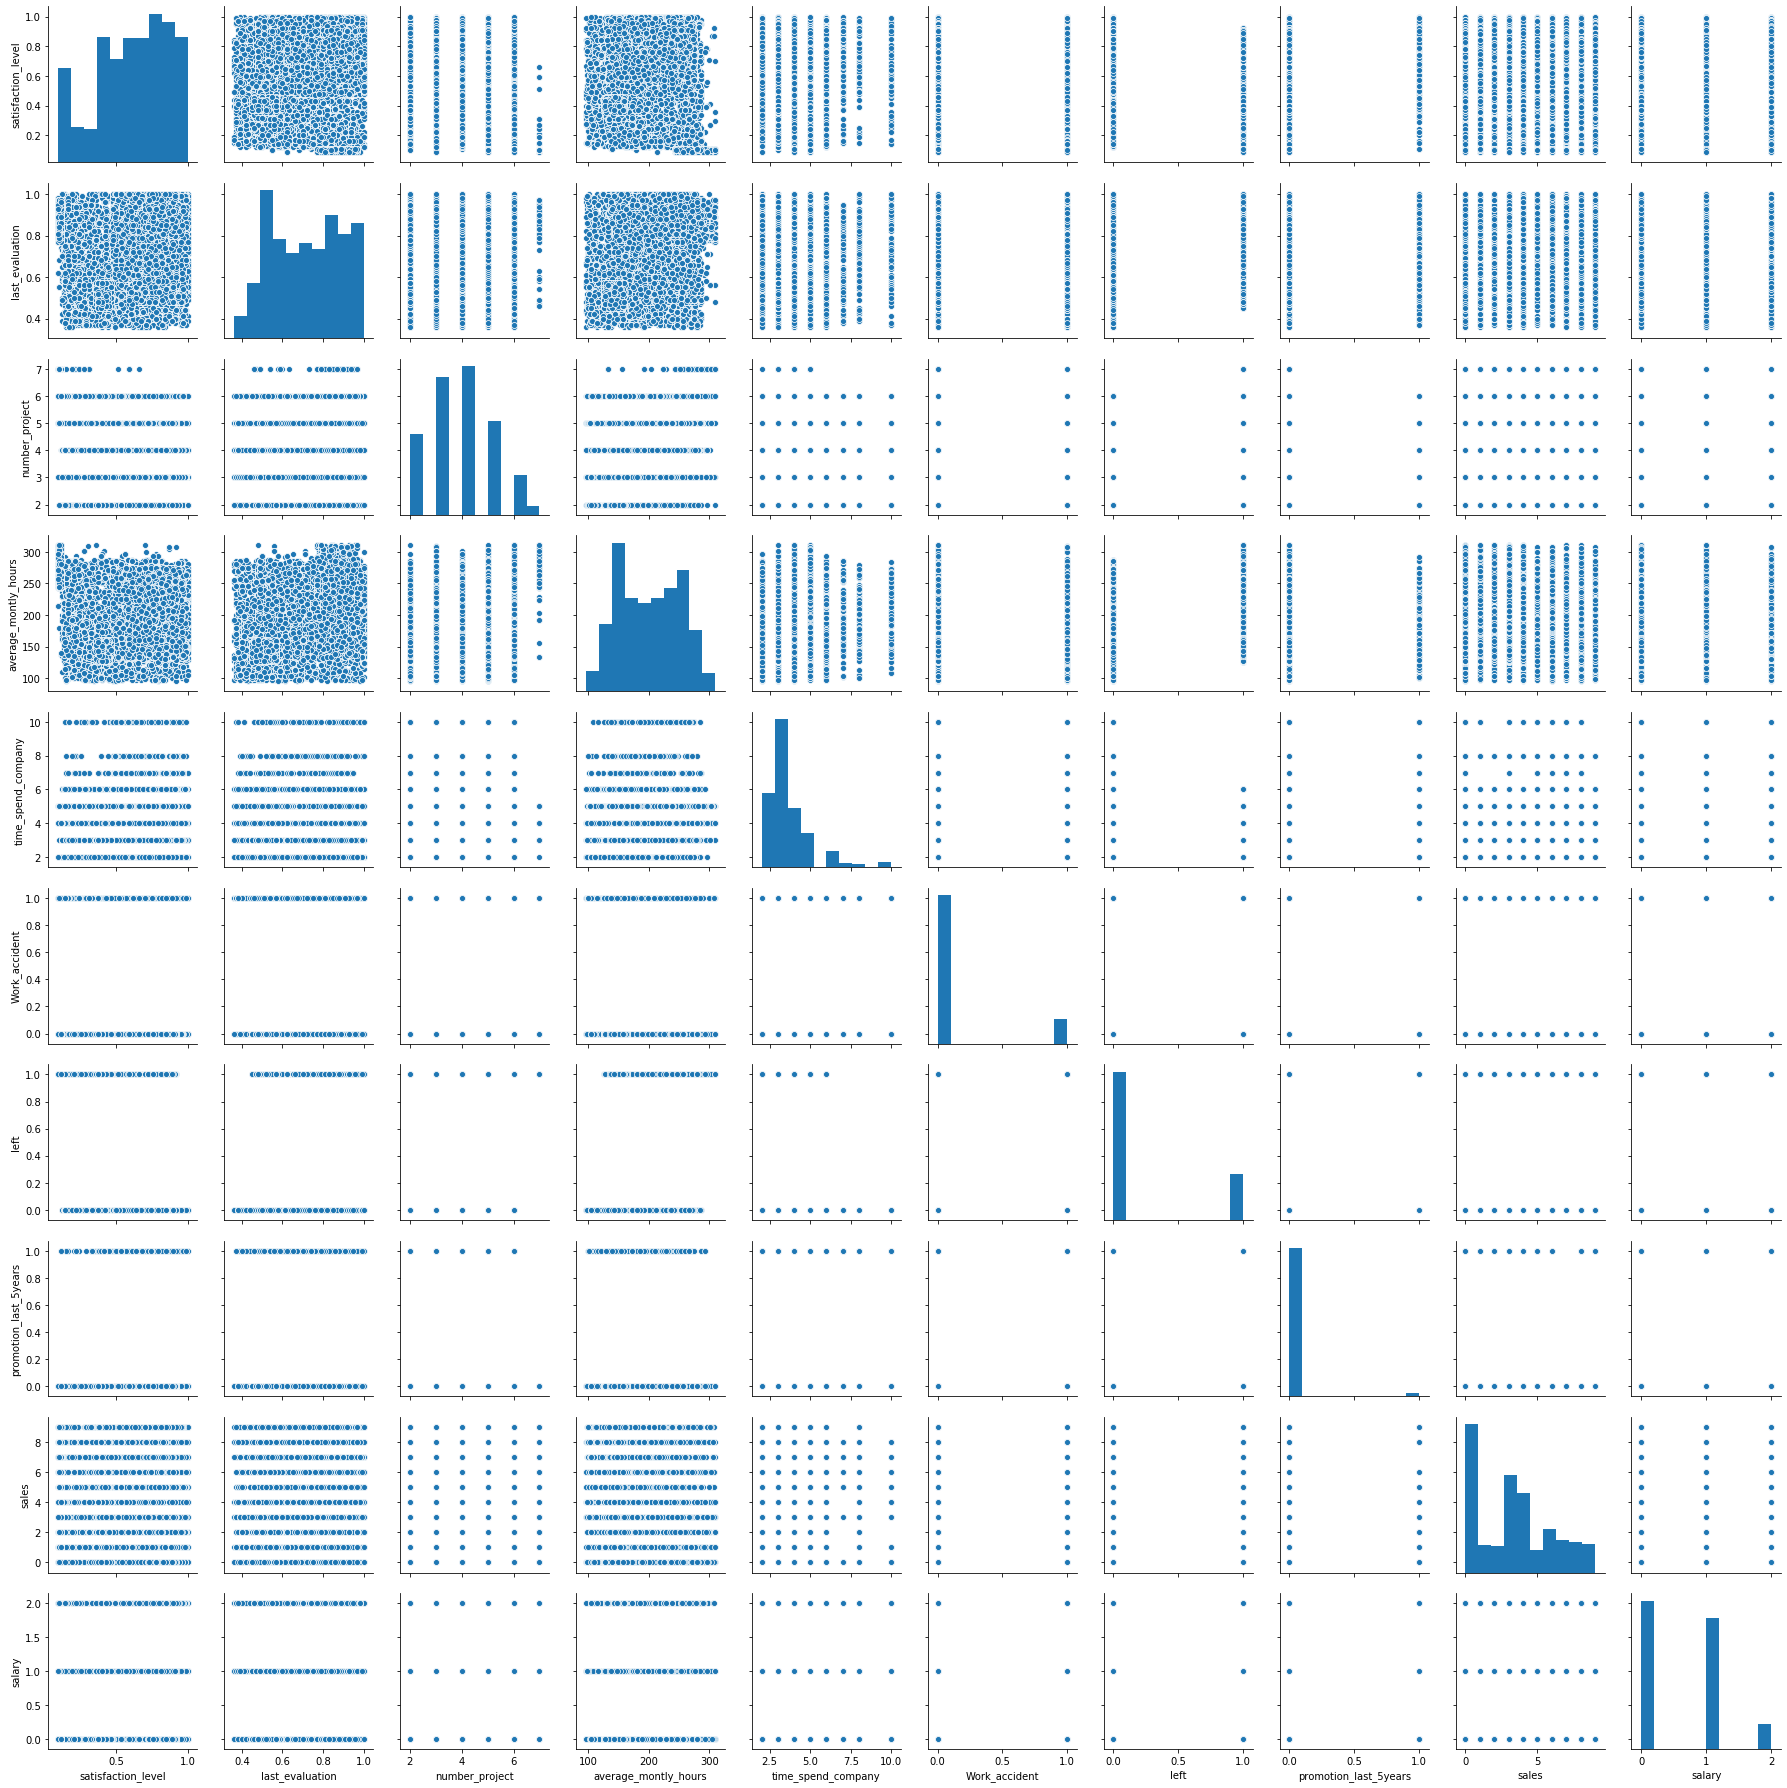

In [12]:
g = sns.pairplot(dataset)

## С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [44]:
from scipy.stats import shapiro
alpha = 0.05
stat, p = shapiro(dataset['last_evaluation'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
# 
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.952, p=0.000
Probably not Gaussian


In [30]:
left = data[data['left']==1]['last_evaluation']
print(left.mean())
print(data['last_evaluation'].mean())
stats.ttest_1samp(left, data['last_evaluation'].mean())

0.7181125735088183
0.7161017401159978


Ttest_1sampResult(statistic=0.6078870291631877, pvalue=0.5433010700614106)

Проверка на статическую взаимосвязь оценкой работников ранее между теми работниками, кто остался и ушёл из фирмы.

In [37]:
res_t_test0 = data[data['left']==0]['last_evaluation']

res_t_test1 = data[data['left']==1]['last_evaluation']

print(stats.ttest_ind(res_t_test0, res_t_test1))

Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056)


Проверка на статическую взаимосвязь уровня удовлетворённости работников между теми работниками, кто остался и ушёл из фирмы.

In [36]:
res_t_test0 = data[data['left']==0]['satisfaction_level']

res_t_test1 = data[data['left']==1]['satisfaction_level']

print(stats.ttest_ind(res_t_test0, res_t_test1))

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)


Проверка на статическую взаимосвязь оценкой работников ранее между теми работниками, у кого был несчастный случай на работе и не был.

In [47]:
res_t_test0 = data[data['Work_accident']==0]['last_evaluation']

res_t_test1 = data[data['Work_accident']==1]['last_evaluation']

print(stats.ttest_ind(res_t_test0, res_t_test1))

Ttest_indResult(statistic=0.8700290350249095, pvalue=0.38429846201039486)


Проверка на статическую взаимосвязь уровня удовлетворённости работников между теми работниками, у кого был несчастный случай на работе и не был.

In [48]:
res_t_test0 = data[data['Work_accident']==0]['satisfaction_level']

res_t_test1 = data[data['Work_accident']==1]['satisfaction_level']

print(stats.ttest_ind(res_t_test0, res_t_test1))

Ttest_indResult(statistic=-7.200610639695171, pvalue=6.279179915219481e-13)


## Рассчитать сколько работников работает в каждом департаменте.

In [4]:
amount = data.groupby('sales').count().reset_index()
amount_workers = amount[['sales','satisfaction_level']]
amount_workers.columns = ['sales','Count']
amount_workers

,sales,Count
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


## Показать распределение сотрудников по зарплатам.

In [57]:
amount = data.groupby('salary').count().reset_index()
amount_workers = amount[['salary','satisfaction_level']]
amount_workers.columns = ['salary','Count']
amount_workers=amount_workers.sort_values(by='Count')
amount_workers

,salary,Count
0,high,1237
2,medium,6446
1,low,7316


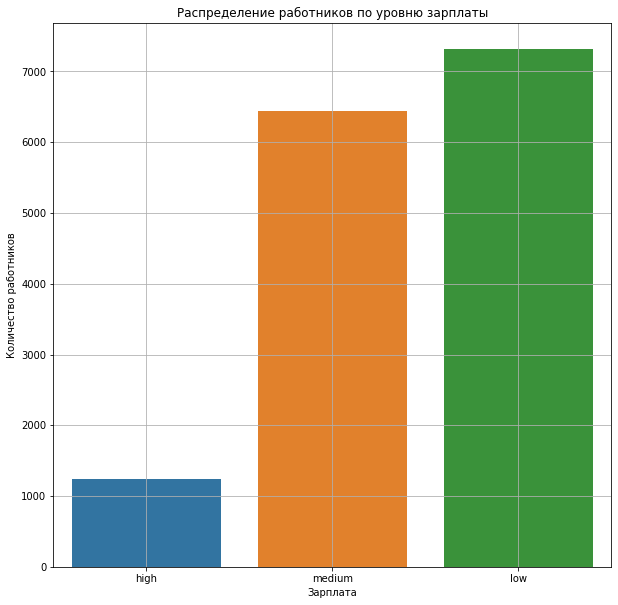

In [58]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=amount_workers['salary'], y=amount_workers['Count'])

plt.xlabel('Зарплата')
plt.ylabel('Количество работников')
plt.title("Распределение работников по уровню зарплаты")
plt.grid()
plt.show()

## Показать распределение сотрудников по зарплатам совместно с департаментами.

In [60]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

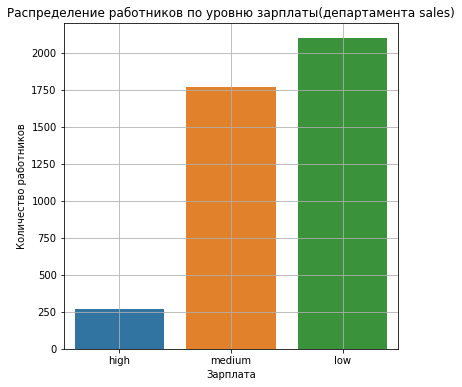

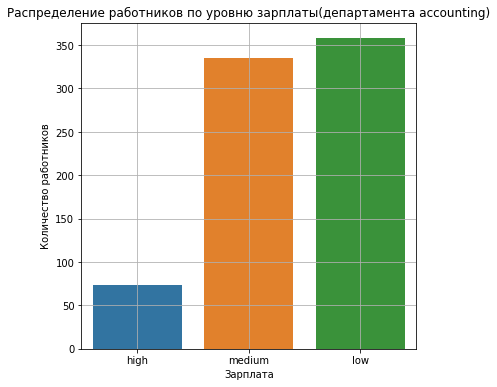

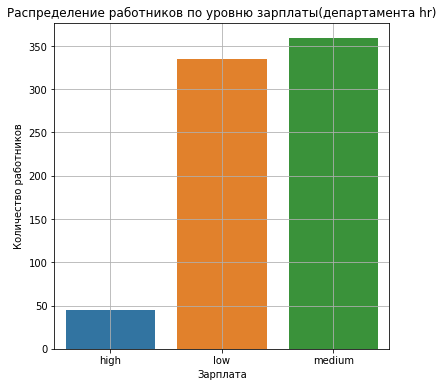

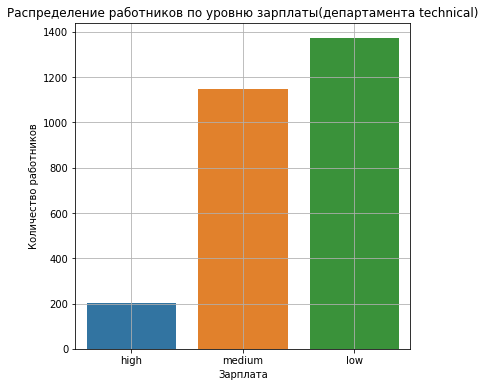

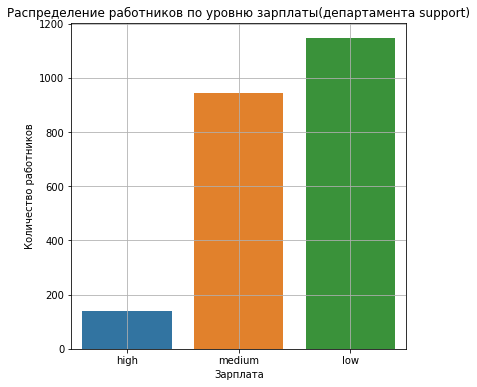

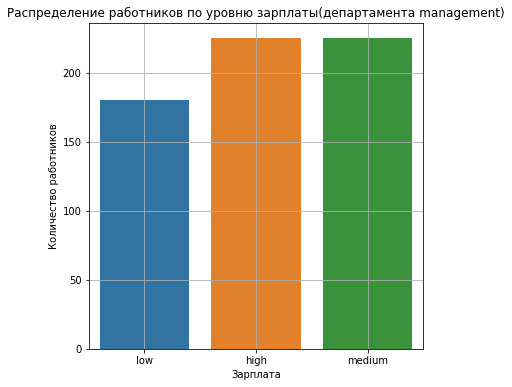

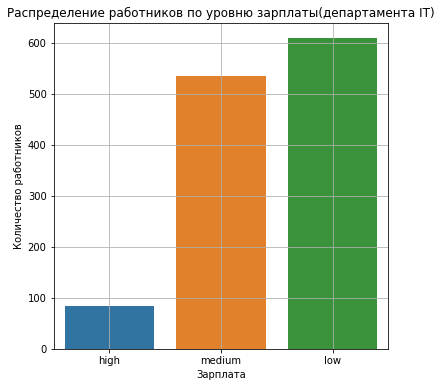

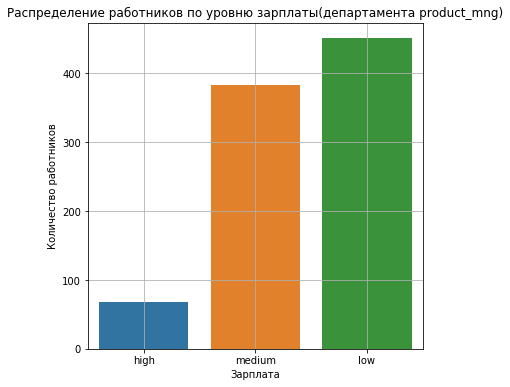

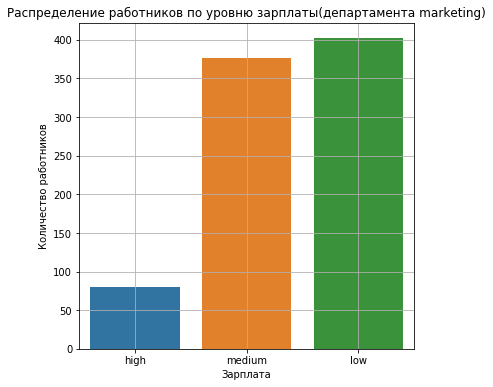

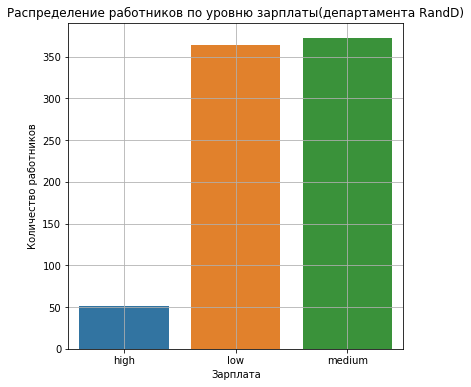

In [61]:
for x in data['sales'].unique():
    y = data[ data.sales == x]
    amount1 = y.groupby('salary').count().reset_index()
    amount1_workers = amount1[['salary','satisfaction_level']]
    amount1_workers.columns = ['salary','Count']
    amount1_workers=amount1_workers.sort_values(by='Count')
    
    f, ax = plt.subplots(figsize=(6, 6))
    sns.barplot(x=amount1_workers['salary'], y=amount1_workers['Count'])
    
    plt.xlabel('Зарплата')
    plt.ylabel('Количество работников')
    plt.title('Распределение работников по уровню зарплаты(департамента '+str(x)+')')
    plt.grid()
plt.show()

## Сколько сотрудников покинули компанию.

In [24]:
amount = data.groupby('left').count().reset_index()
amount_workers = amount[['left','satisfaction_level']]
amount_workers.columns = ['left','Count']
amount_workers

,left,Count
0,0,11428
1,1,3571


In [34]:
left_workers = data[data['left']==1].count()
print('Количество работников, которые покинули компанию:', left_workers[0])

Количество работников, которые покинули компанию: 3571


## Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [211]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

X = dataset[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','sales','salary']]
Y=le.fit_transform(dataset.left)

from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(X, Y, test_size=0.3)

In [212]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

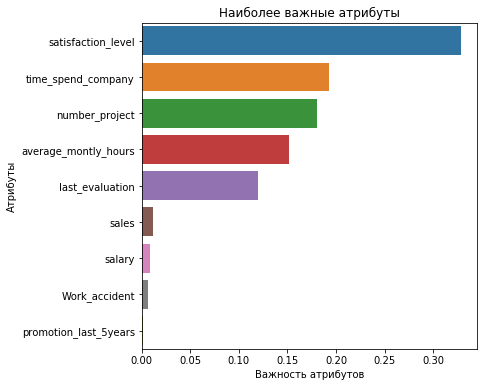

In [213]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

# Отличались ли и раньше оценки работников?

In [49]:
from scipy.stats import shapiro
alpha = 0.05
stat, p = shapiro(dataset['last_evaluation'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
# 
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.952, p=0.000
Probably not Gaussian


In [50]:
res_t_test0 = data[data['left']==0]['last_evaluation']

res_t_test1 = data[data['left']==1]['last_evaluation']

print(stats.ttest_ind(res_t_test0, res_t_test1))

Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056)


In [51]:
len(res_t_test0), len(res_t_test1)

(11428, 3571)

In [52]:
res_t_test0 = res_t_test0.sample(3571)
res_t_test1 = res_t_test1.sample(3571)

In [53]:
statistics.variance(res_t_test0), statistics.variance(res_t_test1)

(0.026002221395979283, 0.03907475595110629)

In [54]:
print(stats.ttest_ind(res_t_test0, res_t_test1, equal_var=True))

Ttest_indResult(statistic=0.1056129721050089, pvalue=0.9158923988554964)


Оценки работников раньше не отличались!

# Совпадают ли оценки работников сейчас?

In [59]:
from scipy.stats import shapiro
alpha = 0.05
stat, p = shapiro(data['satisfaction_level'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
# 
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.952, p=0.000
Probably not Gaussian


In [60]:
res_t_test0 = data[data['left']==0]['satisfaction_level']

res_t_test1 = data[data['left']==1]['satisfaction_level']

print(stats.ttest_ind(res_t_test0, res_t_test1))

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)


In [61]:
len(res_t_test0), len(res_t_test1)

(11428, 3571)

In [62]:
res_t_test0 = res_t_test0.sample(3571)
res_t_test1 = res_t_test1.sample(3571)

In [63]:
statistics.variance(res_t_test0), statistics.variance(res_t_test1)

(0.04540244214403768, 0.06966085873834273)

In [67]:
print(stats.ttest_ind(res_t_test0, res_t_test1, equal_var=False))

Ttest_indResult(statistic=40.05930280847562, pvalue=0.0)


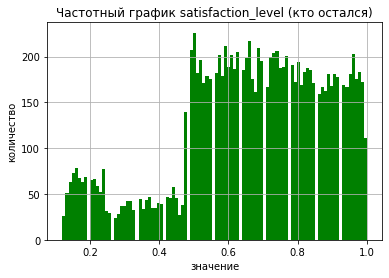

In [4]:
s = dataset[dataset['left'] == 0]

n, bins, patches = plt.hist(s['satisfaction_level'], 100, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график satisfaction_level (кто остался)')
plt.grid(True)
plt.show()

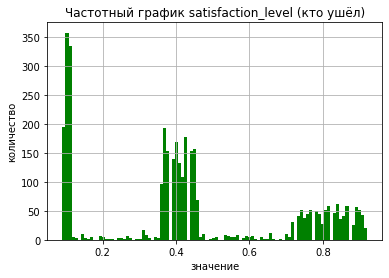

In [5]:
l = dataset[dataset['left'] == 1]

n, bins, patches = plt.hist(l['satisfaction_level'], 100, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график satisfaction_level (кто ушёл)')
plt.grid(True)
plt.show()

Мнения людей стали отличаться (в основном увольняемые не довольны фирмой)!

# Люди увольняются из-за большой разницы в зарплатах?

In [69]:
from scipy.stats import shapiro
alpha = 0.05
stat, p = shapiro(dataset['salary'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
# 
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.747, p=0.000
Probably not Gaussian


In [70]:
res_t_test0 = dataset[dataset['left']==0]['salary']

res_t_test1 = dataset[dataset['left']==1]['salary']

print(stats.ttest_ind(res_t_test0, res_t_test1))

Ttest_indResult(statistic=19.58216626170969, pvalue=2.475238171818194e-84)


In [71]:
len(res_t_test0), len(res_t_test1)

(11428, 3571)

In [72]:
res_t_test0 = res_t_test0.sample(3571)
res_t_test1 = res_t_test1.sample(3571)

In [73]:
statistics.variance(res_t_test0), statistics.variance(res_t_test1)

(0.43242443995240215, 0.2887353541248479)

In [74]:
print(stats.ttest_ind(res_t_test0, res_t_test1, equal_var=False))

Ttest_indResult(statistic=16.197990481379865, pvalue=6.1151186731284775e-58)


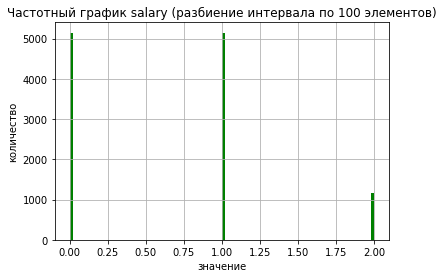

In [72]:
s = dataset[dataset['left'] == 0]

n, bins, patches = plt.hist(s['salary'], 100, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график salary (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

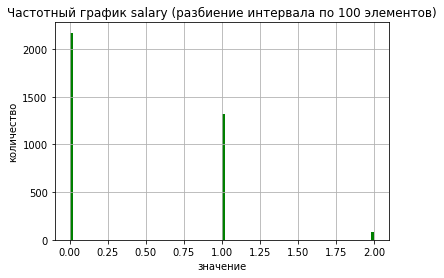

In [74]:
l = dataset[dataset['left'] == 1]

n, bins, patches = plt.hist(l['salary'], 100, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график salary (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

В основном уходят люди с невысокой зарплатой!

## Люди уходят из разных отделов или из всех?

In [79]:
res_t_test0 = dataset[dataset['left']==0]['sales']

res_t_test1 = dataset[dataset['left']==1]['sales']

print(stats.ttest_ind(res_t_test0, res_t_test1))

Ttest_indResult(statistic=5.370709711356832, pvalue=7.959668924973437e-08)


In [80]:
len(res_t_test0), len(res_t_test1)

(11428, 3571)

In [81]:
res_t_test0 = res_t_test0.sample(3571)
res_t_test1 = res_t_test1.sample(3571)

In [82]:
statistics.variance(res_t_test0), statistics.variance(res_t_test1)

(8.112913314303599, 7.305786184538223)

In [84]:
print(stats.ttest_ind(res_t_test0, res_t_test1, equal_var=True))

Ttest_indResult(statistic=4.044337731225042, pvalue=5.302372047753955e-05)


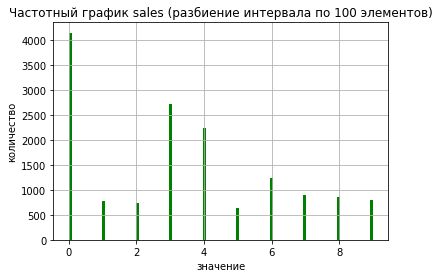

In [23]:
n, bins, patches = plt.hist(dataset['sales'], 100, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график sales (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

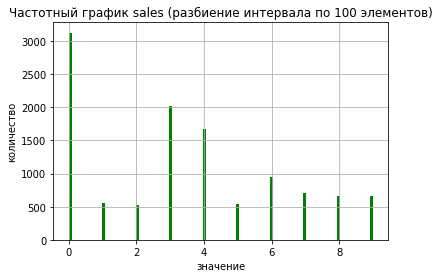

In [76]:
s = dataset[dataset['left'] == 0]

n, bins, patches = plt.hist(s['sales'], 100, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график sales (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

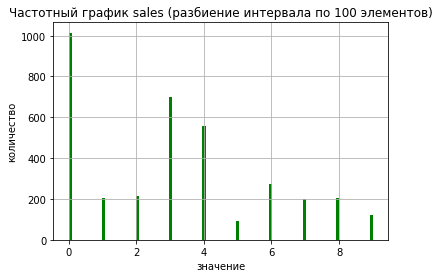

In [78]:
l = dataset[dataset['left'] == 1]

n, bins, patches = plt.hist(l['sales'], 100, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график sales (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Они уходят из всех отделов!

## Влияют ли несчастные случаи на оценки работников?

In [219]:
res_t_test0 = l[l['Work_accident']==0]['satisfaction_level']

res_t_test1 = l[l['Work_accident']==1]['satisfaction_level']

print(stats.ttest_ind(res_t_test0, res_t_test1))

Ttest_indResult(statistic=-0.35034510372007616, pvalue=0.7261003943350808)


In [220]:
len(res_t_test0), len(res_t_test1)

(3402, 169)

In [221]:
res_t_test0 = res_t_test0.sample(169)
res_t_test1 = res_t_test1.sample(169)

In [222]:
statistics.variance(res_t_test0), statistics.variance(res_t_test1)

(0.07505344463229079, 0.07485309946463792)

In [223]:
print(stats.ttest_ind(res_t_test0, res_t_test1, equal_var=True))

Ttest_indResult(statistic=0.4231807998103087, pvalue=0.6724340837037592)


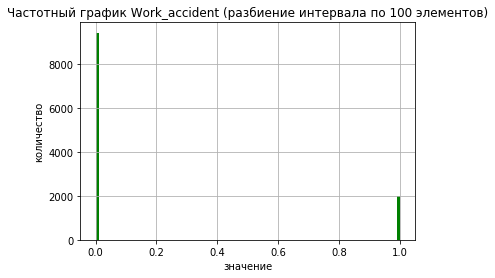

In [109]:
s = dataset[dataset['left'] == 0]

n, bins, patches = plt.hist(s['Work_accident'], 100, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график Work_accident (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

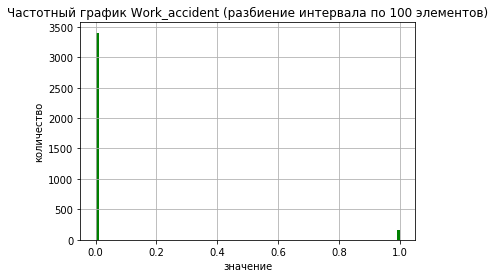

In [110]:
l = dataset[dataset['left'] == 1]

n, bins, patches = plt.hist(l['Work_accident'], 100, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график Work_accident (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Они уходят не из-за несчастных случаев!

## Стажи работы оставшихся сотрудников совпадает с теми, кто ушёл?

In [230]:
res_t_test0 = dataset[dataset['left']==0]['time_spend_company']

res_t_test1 = dataset[dataset['left']==1]['time_spend_company']

print(stats.ttest_ind(res_t_test0, res_t_test1))

Ttest_indResult(statistic=-17.924210234916142, pvalue=4.207680457692835e-71)


In [225]:
len(res_t_test0), len(res_t_test1)

(11428, 3571)

In [226]:
res_t_test0 = res_t_test0.sample(3571)
res_t_test1 = res_t_test1.sample(3571)

In [227]:
statistics.variance(res_t_test0), statistics.variance(res_t_test1)

(2.5777767841944956, 0.9558932169899603)

In [228]:
print(stats.ttest_ind(res_t_test0, res_t_test1, equal_var=True))

Ttest_indResult(statistic=-14.982220899764377, pvalue=5.486192825955763e-50)


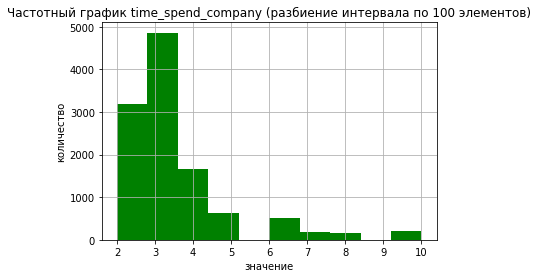

In [128]:
s = dataset[dataset['left'] == 0]

n, bins, patches = plt.hist(s['time_spend_company'], 10, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график time_spend_company (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

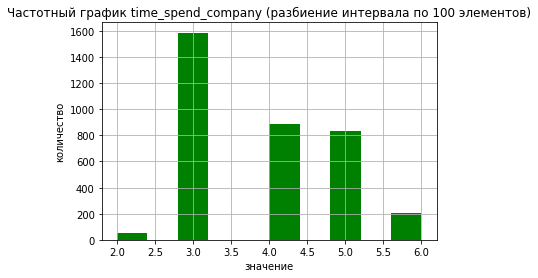

In [129]:
l = dataset[dataset['left'] == 1]

n, bins, patches = plt.hist(l['time_spend_company'], 10, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график time_spend_company (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Не совпадает, основном работники уволились из фирмы со стажем (3 - 5 лет)!

## Повлияло ли повышение на мнение тех, кто уволился?

In [233]:
res_t_test0 = dataset[dataset['left']==0]['promotion_last_5years']

res_t_test1 = dataset[dataset['left']==1]['promotion_last_5years']

print(stats.ttest_ind(res_t_test0, res_t_test1))

len(res_t_test0), len(res_t_test1)

Ttest_indResult(statistic=7.581195349367637, pvalue=3.624047224146943e-14)


(11428, 3571)

In [234]:
res_t_test0 = res_t_test0.sample(3571)
res_t_test1 = res_t_test1.sample(3571)

In [237]:
statistics.variance(res_t_test0), statistics.variance(res_t_test1)

(0.025902716169077546, 0.005293811727995594)

In [238]:
print(stats.ttest_ind(res_t_test0, res_t_test1, equal_var=True))

Ttest_indResult(statistic=7.200547784754648, pvalue=6.609693091299475e-13)


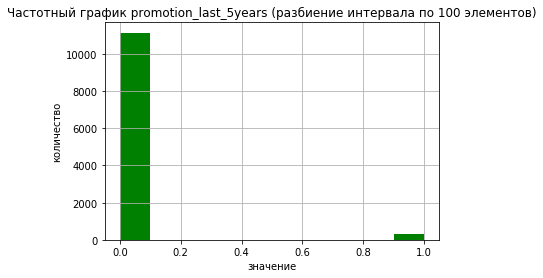

In [133]:
s = dataset[dataset['left'] == 0]

n, bins, patches = plt.hist(s['promotion_last_5years'], 10, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график promotion_last_5years (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

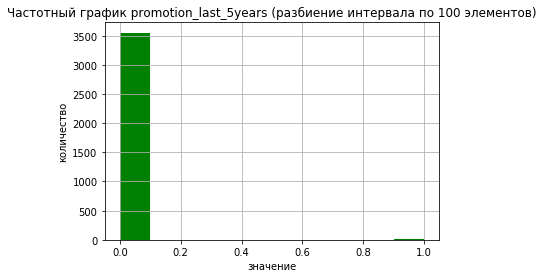

In [134]:
l = dataset[dataset['left'] == 1]

n, bins, patches = plt.hist(l['promotion_last_5years'], 10, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график promotion_last_5years (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

За последние 5 лет мало у кого было повышение!

## График работы увольняемых совпадает с теми, кто остался работать дальше в фирме?

In [239]:
res_t_test0 = dataset[dataset['left']==0]['average_montly_hours']

res_t_test1 = dataset[dataset['left']==1]['average_montly_hours']

print(stats.ttest_ind(res_t_test0, res_t_test1))

len(res_t_test0), len(res_t_test1)

Ttest_indResult(statistic=-8.752254731850009, pvalue=2.3113035567540143e-18)


(11428, 3571)

In [240]:
res_t_test0 = res_t_test0.sample(3571)
res_t_test1 = res_t_test1.sample(3571)

In [241]:
statistics.variance(res_t_test0), statistics.variance(res_t_test1)

(2077.076308451132, 3745.7858381437145)

In [242]:
print(stats.ttest_ind(res_t_test0, res_t_test1, equal_var=False))

Ttest_indResult(statistic=-5.964935125806433, pvalue=2.5739558459695418e-09)


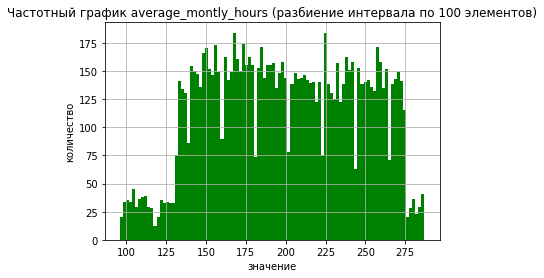

In [141]:
s = dataset[dataset['left'] == 0]

n, bins, patches = plt.hist(s['average_montly_hours'], 100, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график average_montly_hours (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

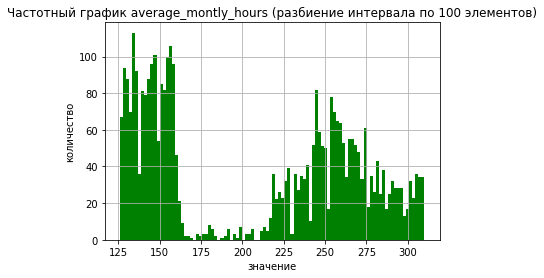

In [142]:
l = dataset[dataset['left'] == 1]

n, bins, patches = plt.hist(l['average_montly_hours'], 100, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график average_montly_hours (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Работники уволились с определённых графиков!

## Люди уходят с разных проектов или нет?

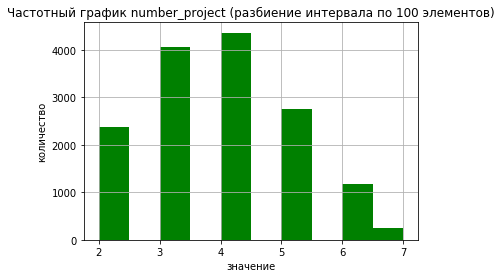

In [155]:
n, bins, patches = plt.hist(data['number_project'], 10, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график number_project (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

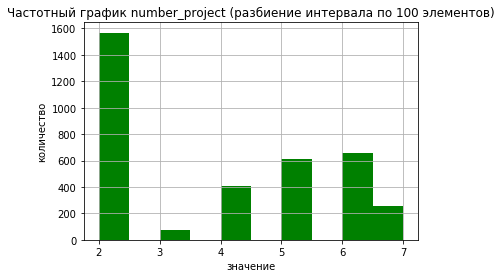

In [153]:
l = dataset[dataset['left'] == 1]

n, bins, patches = plt.hist(l['number_project'], 10, facecolor='g')

plt.xlabel('значение')
plt.ylabel('количество')
plt.title('Частотный график number_project (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Работников ушло: 100% с проекта 7, 66% с проекта 2, 56% с проекта 6, 22% с проекта 5, 9% с проекта 4, 2% с проекта 3!

## Почему упали оценки работников, которые ушли из фирмы?

In [10]:
l_low = l[l['salary']==0]
l_medium = l[l['salary']==1]

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

X = l_low[['number_project','average_montly_hours','time_spend_company','promotion_last_5years','sales']]
Y=le.fit_transform(l_low.satisfaction_level)

from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(X, Y, test_size=0.3)

In [12]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
dataset2 = dataset[['left','satisfaction_level','number_project','average_montly_hours','time_spend_company']]

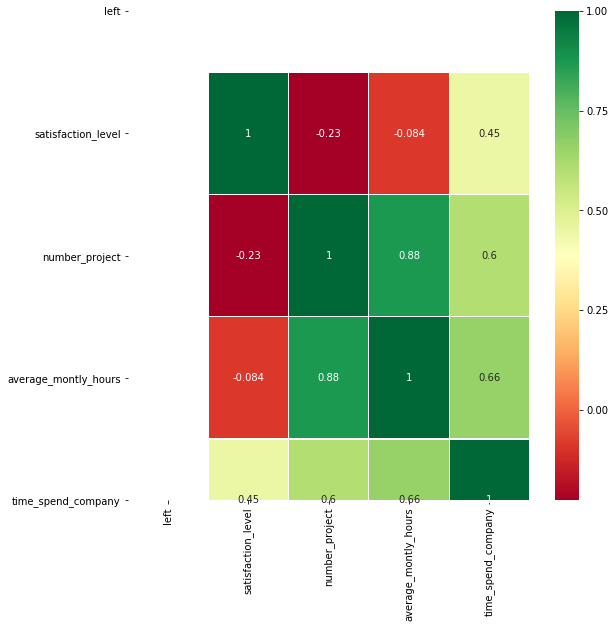

In [17]:
l2 = dataset2[dataset2['left'] == 1]

sns.heatmap(l2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(9,9)
plt.show()

In [214]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

X = l2[['number_project','average_montly_hours','time_spend_company']]
Y=le.fit_transform(l2.satisfaction_level)

from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(X, Y, test_size=0.3)

In [215]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

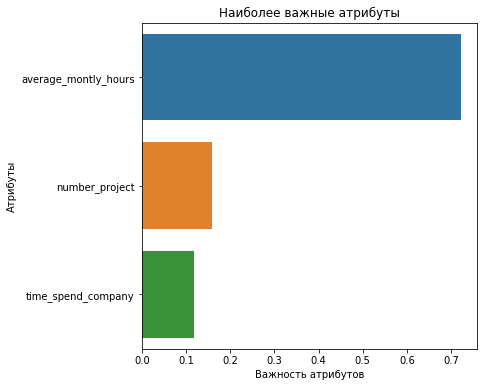

In [216]:
headers = list(X_train_22.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

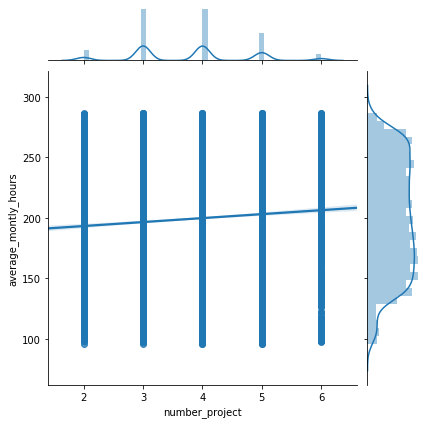

In [209]:
sns.jointplot(x=s2['number_project'], y=s2['average_montly_hours'], 
              data=s2, kind='reg')

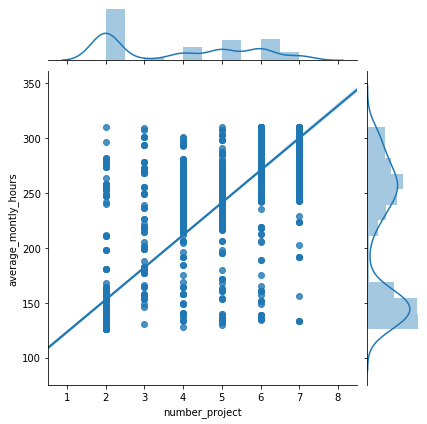

In [158]:
sns.jointplot(x=l2['number_project'], y=l2['average_montly_hours'], 
              data=l2, kind='reg')

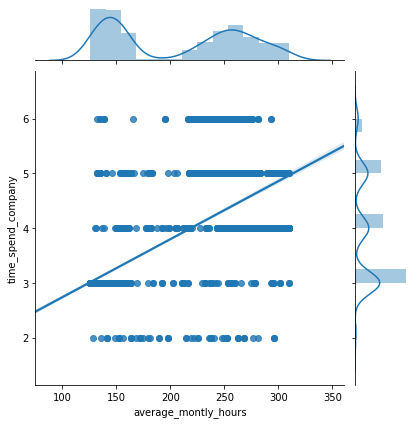

In [196]:
sns.jointplot(x=l2['average_montly_hours'], y=l2['time_spend_company'], 
              data=l2, kind='reg')

## Итоги

После получения среднего стажа работы, уволились работники из-за зарплаты, которая их неудовлетворяет. А дальнейшая для них работа на определённых проектах с большой отдачей времени не имеет смысла, так как повышений на данной фирме почти нет(возможно потому, что фирма слишком маленькая).